<img heigth="8" src="https://i.imgur.com/3mimh4M.png" alt="guane">

<h1 align="left">Data Science and Machine Learning</h1>

<p align="left"><i>A Data Project Template for Building Robust, Reproducible and Maintainable Predictive Solutions</i></p>

<p align="left">
  DS&ML Team | <a href="https://guane.com.co/">guane enterprises</a>
  <br>
  <b>Last updated:</b> <i>06/03/2023</i>
  <br><br>
  <a target="_blank">
    <img src="https://github.com/QData/TextAttack/workflows/Github%20PyTest/badge.svg" alt="Testing">
  </a>
  <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
    <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
  </a>
</p><br>
<p align="left">
  <a href="#introduction">Introduction</a><br>
  <a href="#1-data-adquisition">1. Data Adquisition</a><br>
  <a href="#2-exploratory-data-analysis">2. Exploratory Data Analysis</a><br>
  <a href="#3-training-models">3. Training Models</a><br>
  <br>
</p>

---

With this notebook you can test the template to develop your predictive solution.

<a id="1-data-extraction"></a>
## Introduction

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Se comenta por ahora para no tener que estar reiniciando el kernel.

# import os
# try:
#     import importlib

#     __package__ = "src"

#     found = False
#     while not found:
#         os.chdir(os.path.join(os.getcwd(), os.pardir))
#         found = bool(importlib.util.find_spec(__package__))
#         if found:
#             print(f"[INFO] WORKDIR: {os.path.join(os.getcwd(), os.pardir)}")
#         continue
# except ModuleNotFoundError as e:
#     print("[ERROR] Verify WORKDIR execution: ", e)


#Instead, we will use the following code to add the path to the sys.path
import sys
sys.path.append("..")

In [3]:
import src
from src.utils import set_seed_everything

print(f"[INFO] Package version: {src.__version__}")

[INFO] Package version: v0.1.0


In [4]:
SEED = 20180507
set_seed_everything(SEED)

<a id="1-model-family-settings-validation"></a>
## 1. Data Adquisition

For the initial data adquisition, we run the dataloader script from scripts. This extracts the files from the zip downloaded in datalake and then we proceed to read the data here.

In [5]:
data = pd.read_parquet("../datalake/out-of-stock/out-of-stock/train.parquet")

## About this file

### Training dataset

#### Column descriptors
- **sku**: stock keeping unit. SKU is a combination of an item and a variation.
- **date**: YYYY-MM-DD
- **sold_quantity**: number of units of the corresponding SKU that were sold on that particular date.
- **current_price**: point in time correct SKU's price.
- **currency**: currency in which the price is expressed. Possible values are ARG, DOL, MEX, and REA.
- **listing_type**: type of listing the SKU had for that particular date. Possible values are classic or premium and they relate to the exposure the items have and the fee charged to the seller as a sales commission. Another important advantage for an item listed as premium is its capability to pay in installments without interest rate.
- **shipping_logistic_type**: type of shipping method the SKU offered, for that particular date. Possible values are fulfillment, cross_docking, and drop_off.
- **shipping_payment**: whether the shipping for the offered SKU at that particular date was free or paid, from the buyer's perspective.
- **minutes_active**: number of minutes the SKU was available for purchase on that particular date.


source: https://www.kaggle.com/code/hubot01/melidata21-workshop/input?select=meli_train_data.parquet

Our goal is to construct a probability distribution of a product being sold in the next 30 days since available for purchase.

In [6]:
data

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,1440.000000
...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,22057.00,ARG,classic,drop_off,free_shipping,267.710767
37660275,6707,2021-03-31,0,26999.00,ARG,classic,cross_docking,free_shipping,266.083333
37660276,170355,2021-03-31,0,3400.00,ARG,classic,drop_off,paid_shipping,0.252633
37660277,246568,2021-03-31,0,6289.00,ARG,classic,fulfillment,free_shipping,135.416667


<a id="2-exploratory-data-analysis"></a>
## 2. Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37660279 entries, 0 to 37660278
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   sku                     int64  
 1   date                    object 
 2   sold_quantity           int64  
 3   current_price           float64
 4   currency                object 
 5   listing_type            object 
 6   shipping_logistic_type  object 
 7   shipping_payment        object 
 8   minutes_active          float64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.5+ GB


In [8]:
data.describe()

,sku,sold_quantity,current_price,minutes_active
count,3.766028e+07,3.766028e+07,3.766028e+07,3.766028e+07
mean,3.303739e+05,9.900934e-01,2.357780e+03,1.043415e+03
std,1.907922e+05,9.989535e+00,1.263914e+06,6.302455e+02
min,0.000000e+00,0.000000e+00,8.700000e-01,0.000000e+00
25%,1.651250e+05,0.000000e+00,4.870000e+01,0.000000e+00
50%,3.303800e+05,0.000000e+00,1.190000e+02,1.440000e+03
75%,4.955960e+05,1.000000e+00,2.985900e+02,1.440000e+03
max,6.609150e+05,6.951000e+03,1.000000e+09,1.440000e+03


In [9]:
data["date"] = pd.to_datetime(data["date"])

In [10]:
#Checking for missing values and if data types are correct
nan_and_dtypes = pd.DataFrame({
    "nan": data.isna().sum(),
    "dtype": data.dtypes,
    "nunique": data.nunique()
})
nan_and_dtypes

,nan,dtype,nunique
sku,0,int64,660916
date,0,datetime64[ns],59
sold_quantity,0,int64,1396
current_price,0,float64,140924
currency,0,object,4
listing_type,0,object,2
shipping_logistic_type,0,object,3
shipping_payment,0,object,2
minutes_active,0,float64,1009253


We have 660916 unique sku's

In [11]:
data["sku"].value_counts()

464801    59
577879    59
7567      59
293613    59
6396      59
          ..
425593     1
245107     1
384501     1
579285     1
49718      1
Name: sku, Length: 660916, dtype: int64

Most of them have almost 60 entries in the dataset

<Axes: >

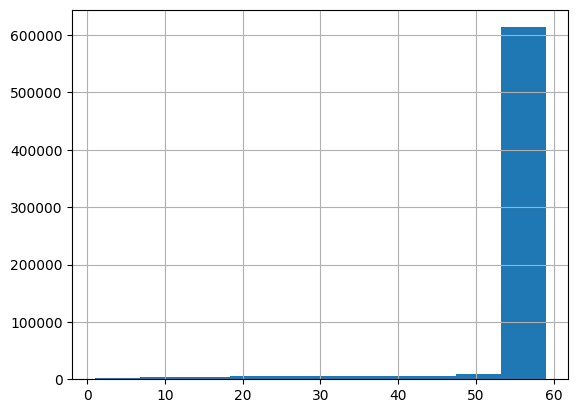

In [12]:
data["sku"].value_counts().hist()

In [13]:
data["date"].min(), data["date"].max(), data["date"].max() - data["date"].min()

(Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timedelta('58 days 00:00:00'))

These entries tell us how the price of the product changes overtime, how many units are sold and how some other categorical features change over 59 days.

In [14]:
data[data["sku"] == 97604]

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
34381015,97604,2021-03-23,0,485.0,MEX,premium,cross_docking,free_shipping,343.383333
34381016,97604,2021-03-24,0,485.0,MEX,premium,cross_docking,free_shipping,1440.000000
34381017,97604,2021-03-25,2,485.0,MEX,premium,cross_docking,free_shipping,1418.824800
34381018,97604,2021-03-26,7,485.0,MEX,premium,fulfillment,free_shipping,1440.000000
34381019,97604,2021-03-27,10,485.0,MEX,premium,fulfillment,free_shipping,1440.000000
34381020,97604,2021-03-28,5,485.0,MEX,premium,fulfillment,free_shipping,1440.000000
34381021,97604,2021-03-29,5,485.0,MEX,premium,fulfillment,free_shipping,830.983333
34381022,97604,2021-03-30,0,485.0,MEX,premium,fulfillment,free_shipping,0.000000
34381023,97604,2021-03-31,0,485.0,MEX,premium,fulfillment,free_shipping,0.000000


The sku-date pair being unique tells us that, for a given sku, each entry is a different date.

In [15]:
tmp = data[["sku", "date"]].value_counts()
tmp[tmp > 1]

Series([], dtype: int64)

Ouf-of-stock event definition

For some of these dates, the sku had less than 1440 minutes_active (remember that a day has 1440 minutes), which tells us that the product was not available for purchase. This will be interpreted as an out-of-stock event (ose).

In [16]:
data[data["minutes_active"] < 1440]["sku"].value_counts()

200820    59
87982     59
502247    59
216330    59
374416    59
          ..
407621     1
8987       1
302674     1
188337     1
49718      1
Name: sku, Length: 542010, dtype: int64

542010

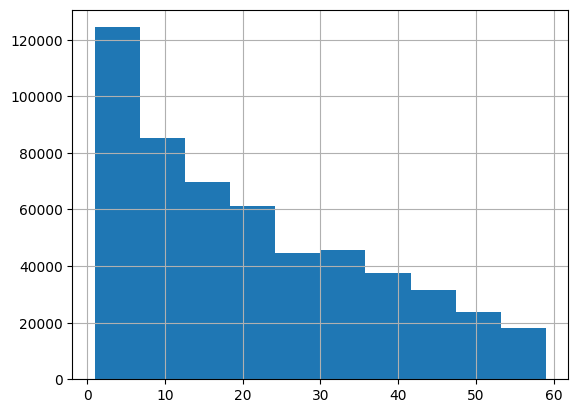

In [17]:
data[data["minutes_active"] < 1440]["sku"].value_counts().hist()
data[data["minutes_active"] < 1440]["sku"].nunique()

<Axes: >

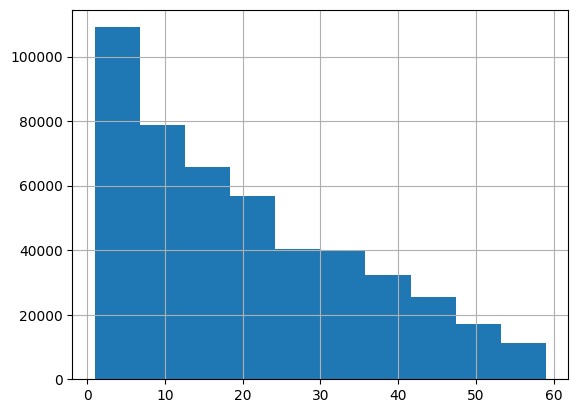

In [18]:
data[data["minutes_active"] == 0].groupby("sku").size().hist()

In [19]:
unique_minutes_active_by_sku = data.groupby("sku").agg({
    "minutes_active": "unique"
})
more_than_one_minutes_active_by_sku = unique_minutes_active_by_sku[unique_minutes_active_by_sku["minutes_active"].apply(lambda x: len(x) == 1)]
skus_never_available = more_than_one_minutes_active_by_sku[more_than_one_minutes_active_by_sku["minutes_active"].apply(lambda x: x[0] == 0)]
skus_to_remove = skus_never_available.index.to_list()

In [20]:
len(skus_to_remove)

6186

542010 out of 660916 (82%) of the sku's did have at lease one ose during those 59 days and, out of that 82% of sku's, 6186 had an ose in all of their days (they were never available). These last will be considered as atypical and won't be taken into account for the analysis since we're insterested in finding out how many days passed before an **initially** available product went out of stock.

In [21]:
skus_with_ose = data[data["minutes_active"] < 1440]["sku"].unique().tolist()

In [22]:
data_with_ose = data[data["sku"].isin(skus_with_ose) & ~data["sku"].isin(skus_to_remove)]

In [23]:
data_with_ose

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
59,645793,2021-02-01,0,134.23,REA,classic,fulfillment,free_shipping,1440.000000
60,645793,2021-02-02,0,134.23,REA,classic,fulfillment,free_shipping,1440.000000
61,645793,2021-02-03,2,145.90,REA,classic,fulfillment,free_shipping,1440.000000
62,645793,2021-02-04,1,145.90,REA,classic,fulfillment,free_shipping,1440.000000
63,645793,2021-02-05,0,145.90,REA,classic,fulfillment,free_shipping,1440.000000
...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,22057.00,ARG,classic,drop_off,free_shipping,267.710767
37660275,6707,2021-03-31,0,26999.00,ARG,classic,cross_docking,free_shipping,266.083333
37660276,170355,2021-03-31,0,3400.00,ARG,classic,drop_off,paid_shipping,0.252633
37660277,246568,2021-03-31,0,6289.00,ARG,classic,fulfillment,free_shipping,135.416667


Now we have to construct our target variable before thinking about training any models. We need to find out how many days passed since the product was available until it got out of stock.

In [24]:
data_with_ose["sku"].value_counts()

645793    59
576659    59
223799    59
562428    59
497674    59
          ..
14723      1
560085     1
84571      1
220265     1
49718      1
Name: sku, Length: 535824, dtype: int64

In [25]:
mocked_df = data_with_ose.groupby("sku").agg({
    "date": "min"
})
mocked_df["date"] = mocked_df["date"] - pd.Timedelta(days=1)
mocked_df["minutes_active"] = 0.0

In [26]:
# data_with_ose_mocked = pd.concat([data_with_ose, mocked_df.reset_index()]).sort_values(["sku", "date"])

In [27]:
# data_with_ose_mocked["scope"] = data_with_ose_mocked["minutes_active"].diff()
# data_with_ose_mocked["ose"] = data_with_ose_mocked.apply(lambda x: 1 if (x["minutes_active"] not in [0, 1440]) and (x["scope"] != 0) else 0, axis=1)

In [28]:
# data_with_ose_mocked.to_parquet("../storage/data/data_with_ose_mocked.parquet")

In [29]:
data_with_ose_mocked = pd.read_parquet("../storage/data/data_with_ose_mocked.parquet")

In [30]:
data_with_ose_mocked[data_with_ose_mocked["ose"] == 1].groupby("sku").size().sort_values(ascending=False)

sku
566498    52
449844    48
645778    45
276726    45
307555    45
          ..
527832     1
107123     1
527829     1
383361     1
477336     1
Length: 535824, dtype: int64

<Axes: >

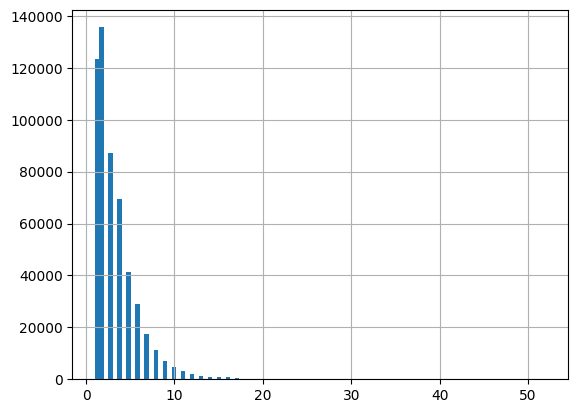

In [31]:
data_with_ose_mocked[data_with_ose_mocked["ose"] == 1].groupby("sku").size().hist(bins=100)

In [32]:
tmp = data_with_ose_mocked[(data_with_ose_mocked["sku"] == 566498)]
tmp

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active,scope,ose
index,,,,,,,,,,,
459118,566498,2021-01-31,NaN,NaN,None,None,None,None,0.000000,0.000000,0
28039497,566498,2021-02-01,0.0,1611.96,MEX,premium,fulfillment,free_shipping,0.000000,0.000000,0
28039498,566498,2021-02-02,0.0,1611.96,MEX,premium,fulfillment,free_shipping,0.000000,0.000000,0
28039499,566498,2021-02-03,0.0,1611.96,MEX,premium,fulfillment,free_shipping,0.000000,0.000000,0
28039500,566498,2021-02-04,0.0,1611.96,MEX,premium,fulfillment,free_shipping,0.000000,0.000000,0
28039501,566498,2021-02-05,0.0,1611.96,MEX,premium,fulfillment,free_shipping,0.000000,0.000000,0
28039502,566498,2021-02-06,0.0,1611.96,MEX,premium,fulfillment,free_shipping,0.000000,0.000000,0
28039503,566498,2021-02-07,0.0,1611.96,MEX,premium,fulfillment,free_shipping,0.000000,0.000000,0
28039504,566498,2021-02-08,1.0,1611.96,MEX,premium,fulfillment,free_shipping,603.566667,603.566667,1


Here we can see how a product can have multiple out-of-stock events. We'll take an average over all the ose's and assigned as number of days the product tipically goes out.

In [33]:
skus_min_date = data_with_ose.groupby("sku").agg(initial_date=("date", "min"))

In [34]:
skus_min_date

,initial_date
sku,
0,2021-02-01
1,2021-02-01
2,2021-03-09
3,2021-02-01
4,2021-02-01
...,...
660911,2021-02-01
660912,2021-02-01
660913,2021-02-01


In [ ]:
data_with_ose_mocked[data_with_ose_mocked["ose"] == 1]

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active,scope,ose
index,,,,,,,,,,,
6094275,0,2021-02-03,0.0,179.99,REA,classic,cross_docking,free_shipping,872.650000,872.650000,1
6094310,0,2021-03-10,0.0,179.99,REA,classic,cross_docking,free_shipping,527.686867,-912.313133,1
6094315,0,2021-03-15,0.0,179.99,REA,classic,fulfillment,free_shipping,83.427300,83.427300,1
8520734,1,2021-02-22,2.0,135.90,REA,premium,fulfillment,free_shipping,1207.250000,1207.250000,1
8520757,1,2021-03-17,1.0,135.90,REA,premium,fulfillment,free_shipping,1390.558300,-49.441700,1
...,...,...,...,...,...,...,...,...,...,...,...
31651981,660915,2021-03-09,0.0,77.99,MEX,classic,fulfillment,paid_shipping,15.000000,15.000000,1
31651982,660915,2021-03-10,1.0,77.99,MEX,classic,fulfillment,paid_shipping,990.883333,975.883333,1
31651986,660915,2021-03-14,2.0,77.99,MEX,classic,fulfillment,paid_shipping,918.230267,918.230267,1


In [ ]:
data_with_ose_mocked

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active,scope,ose
index,,,,,,,,,,,
0,0,2021-01-31,NaN,NaN,None,None,None,None,0.00,NaN,0
6094273,0,2021-02-01,0.0,172.79,REA,classic,cross_docking,free_shipping,0.00,0.00,0
6094274,0,2021-02-02,0.0,172.79,REA,classic,cross_docking,free_shipping,0.00,0.00,0
6094275,0,2021-02-03,0.0,179.99,REA,classic,cross_docking,free_shipping,872.65,872.65,1
6094276,0,2021-02-04,0.0,179.99,REA,classic,cross_docking,free_shipping,1440.00,567.35,0
...,...,...,...,...,...,...,...,...,...,...,...
31651999,660915,2021-03-27,0.0,79.99,MEX,classic,fulfillment,paid_shipping,0.00,0.00,0
31652000,660915,2021-03-28,0.0,79.99,MEX,classic,fulfillment,paid_shipping,0.00,0.00,0
31652001,660915,2021-03-29,0.0,79.99,MEX,classic,fulfillment,paid_shipping,0.00,0.00,0


In [35]:
skus_oses = data_with_ose_mocked[data_with_ose_mocked["ose"] == 1].groupby("sku").agg({
    "date": lambda x: list(x)
})

skus_oses["n_oses"] = skus_oses["date"].apply(len)

In [36]:
skus_oses

,date,n_oses
sku,,
0,"[2021-02-03 00:00:00, 2021-03-10 00:00:00, 202...",3
1,"[2021-02-22 00:00:00, 2021-03-17 00:00:00, 202...",3
2,[2021-03-09 00:00:00],1
3,"[2021-02-11 00:00:00, 2021-02-13 00:00:00, 202...",4
4,"[2021-02-04 00:00:00, 2021-02-08 00:00:00, 202...",10
...,...,...
660911,"[2021-02-20 00:00:00, 2021-02-23 00:00:00, 202...",8
660912,"[2021-02-16 00:00:00, 2021-02-23 00:00:00]",2
660913,"[2021-02-16 00:00:00, 2021-03-12 00:00:00, 202...",3


In [37]:
oses_with_days = skus_min_date.merge(skus_oses, left_index=True, right_index=True)

In [38]:
oses_with_days

,initial_date,date,n_oses
sku,,,
0,2021-02-01,"[2021-02-03 00:00:00, 2021-03-10 00:00:00, 202...",3
1,2021-02-01,"[2021-02-22 00:00:00, 2021-03-17 00:00:00, 202...",3
2,2021-03-09,[2021-03-09 00:00:00],1
3,2021-02-01,"[2021-02-11 00:00:00, 2021-02-13 00:00:00, 202...",4
4,2021-02-01,"[2021-02-04 00:00:00, 2021-02-08 00:00:00, 202...",10
...,...,...,...
660911,2021-02-01,"[2021-02-20 00:00:00, 2021-02-23 00:00:00, 202...",8
660912,2021-02-01,"[2021-02-16 00:00:00, 2021-02-23 00:00:00]",2
660913,2021-02-01,"[2021-02-16 00:00:00, 2021-03-12 00:00:00, 202...",3


In [39]:
oses_with_days["all_dates"] = oses_with_days.apply(lambda x: [x["initial_date"]] + x["date"], axis=1)

For simplicity, we'll treat data as if the stock is renewed the day after it gets out.

In [40]:
#This differences don't take into acount the first date.
oses_with_days["diff"] = oses_with_days["all_dates"].apply(lambda x: [(x[i] - x[i-1]).days for i in range(1, len(x))])

In [42]:
#we use ceil cause we want to round up the number of days.
oses_with_days["mean_diff"] = oses_with_days["diff"].apply(lambda x: np.ceil(np.mean(x)))

In [43]:
oses_with_days = oses_with_days.reset_index()

In [44]:
oses_with_days[oses_with_days["sku"] == 551269]

,sku,initial_date,date,n_oses,all_dates,diff,mean_diff
446795,551269,2021-02-01,"[2021-02-19 00:00:00, 2021-03-03 00:00:00]",2,"[2021-02-01 00:00:00, 2021-02-19 00:00:00, 202...","[18, 12]",15.0


Most of the skus have an out-of-stock event arount 10 days after being published.
A important amount of em are sold out the same day they were published and some others even take more than 50 days.

<Axes: >

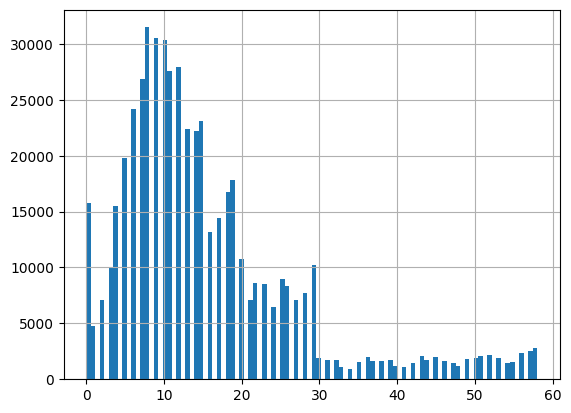

In [45]:
oses_with_days["mean_diff"].hist(bins=100)

In [48]:
data_with_ose_and_mean_diff = data_with_ose.merge(oses_with_days[["sku", "mean_diff", "n_oses"]], on="sku")

In [49]:
data_with_ose_and_mean_diff

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active,mean_diff,n_oses
0,645793,2021-02-01,0,134.23,REA,classic,fulfillment,free_shipping,1440.000000,10.0,2
1,645793,2021-02-02,0,134.23,REA,classic,fulfillment,free_shipping,1440.000000,10.0,2
2,645793,2021-02-03,2,145.90,REA,classic,fulfillment,free_shipping,1440.000000,10.0,2
3,645793,2021-02-04,1,145.90,REA,classic,fulfillment,free_shipping,1440.000000,10.0,2
4,645793,2021-02-05,0,145.90,REA,classic,fulfillment,free_shipping,1440.000000,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...
30347195,129187,2021-03-31,0,22057.00,ARG,classic,drop_off,free_shipping,267.710767,0.0,1
30347196,6707,2021-03-31,0,26999.00,ARG,classic,cross_docking,free_shipping,266.083333,0.0,1
30347197,170355,2021-03-31,0,3400.00,ARG,classic,drop_off,paid_shipping,0.252633,0.0,1
30347198,246568,2021-03-31,0,6289.00,ARG,classic,fulfillment,free_shipping,135.416667,0.0,1


A given sku can vary its different features with time, once again, looking for simplicity, we'll take the mode of its categorical characteristics and other aggregations on the numerical ones.

In [92]:
data_to_model_with = data_with_ose_and_mean_diff.groupby("sku").agg({
    "sold_quantity": "sum",
    "current_price": "mean",
    "currency": lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    "listing_type": lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    "shipping_logistic_type": lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    "shipping_payment": lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    #"minutes_active": "sum", #minutes active would be missleading since we are adding the minutes active of the days after that the product was out of stock.
    "mean_diff": "first",
    "n_oses": "first"
})

In [ ]:
data_to_model_with["sold_quantity_mean"] = np.ceil(data_to_model_with["sold_quantity"] / data_to_model_with["n_oses"])

In [94]:
#rule out those skus with mean sold quantity of 0 since they were never sold and were remove by other causes.
data_to_model_with = data_to_model_with[data_to_model_with["sold_quantity_mean"] != 0].drop(columns=["sold_quantity"])

In [98]:
data_to_model_with.reset_index()

,sku,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,mean_diff,n_oses,sold_quantity_mean
0,0,179.135763,REA,classic,cross_docking,free_shipping,14.0,3,4.0
1,1,135.900000,REA,premium,fulfillment,free_shipping,19.0,3,8.0
2,2,250.304348,MEX,premium,drop_off,paid_shipping,0.0,1,1.0
3,3,399.000000,MEX,premium,fulfillment,free_shipping,14.0,4,2.0
4,4,116.233729,REA,premium,fulfillment,free_shipping,4.0,10,4.0
...,...,...,...,...,...,...,...,...,...
519758,660911,12.803898,REA,classic,fulfillment,paid_shipping,7.0,8,3.0
519759,660912,99.000000,MEX,classic,fulfillment,paid_shipping,11.0,2,7.0
519760,660913,141.330847,REA,premium,fulfillment,free_shipping,16.0,3,4.0
519761,660914,57.651017,REA,premium,fulfillment,paid_shipping,4.0,1,23.0


In [99]:
data_to_model_with.reset_index().to_csv("../storage/data/data_to_model_with.csv", index=False)

In [100]:
data_to_model_with = pd.read_csv("../storage/data/data_to_model_with.csv")

In [101]:
data_to_model_with

,sku,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,mean_diff,n_oses,sold_quantity_mean
0,0,179.135763,REA,classic,cross_docking,free_shipping,14.0,3,4.0
1,1,135.900000,REA,premium,fulfillment,free_shipping,19.0,3,8.0
2,2,250.304348,MEX,premium,drop_off,paid_shipping,0.0,1,1.0
3,3,399.000000,MEX,premium,fulfillment,free_shipping,14.0,4,2.0
4,4,116.233729,REA,premium,fulfillment,free_shipping,4.0,10,4.0
...,...,...,...,...,...,...,...,...,...
519758,660911,12.803898,REA,classic,fulfillment,paid_shipping,7.0,8,3.0
519759,660912,99.000000,MEX,classic,fulfillment,paid_shipping,11.0,2,7.0
519760,660913,141.330847,REA,premium,fulfillment,free_shipping,16.0,3,4.0
519761,660914,57.651017,REA,premium,fulfillment,paid_shipping,4.0,1,23.0


### Let's read metadata


About this file

Add Suggestion
In the file items_static_metadata.jl (notice that the file is actually a jasonline file) there is some extra data related to the SKUs characteristics. It comprises a list of dicts where each dict contains a specific SKU metadata. The following fields are available:

Column descriptors


**sku**: stock-keeping-unit. This is a unique identifier for each physical different unit of inventory.

**item_id**: unique identifier of the listing the SKU belongs to. The same listing can be associated with more than one SKUs, for example, the SKUs "t-shirt X, size M color Black" and "t-shirt X, size M, color red" share the same item_id which is "t-shirt X".

**item_domain_id**: listing's domain id. A domain is a kind of listings clustering within MercadoLibre. For example "t-shirt X" could be in the domain MLB_SPORT_TSHIRT*S.

**item_title**: the listing's title. The title is at item level. So, in the previous example, one possible title could be "t-shirt* X".

**site_id**: the MercadoLibre's site the listing belongs to. The labels MLB, MLA and MLM refer to Brazil, Argentina and Mexico respectively.

**product_id**: listing product id. Field might be null for some listings. Because an item is listed for the seller, it is often common that different sellers sell the same thing (same product). This could be the case of "t-shirt X" if it is sold for many sellers. So in an intent to catalog the same product, MercadoLibre assigns the same product_id to all those items.

**product_id_family**: listing product family id. Field might be null for some listings. This is the same as above, but with a high hierarchy catalog product.

In [65]:
metadata = pd.read_json("../datalake/out-of-stock/out-of-stock/items_metadata.jsonl", lines=True)

In [66]:
metadata

,item_domain_id,item_id,item_title,site_id,sku,product_id,product_family_id
0,MLB-SNEAKERS,492155,Tênis Masculino Olympikus Cyber Barato Promoçao,MLB,0,None,MLB15832732
1,MLB-SURFBOARD_RACKS,300279,Suporte Rack Prancha Parede C/ Regulagem Horiz...,MLB,1,None,None
2,MLM-NECKLACES,69847,5 Collares Plateados Dama Gargantilla Choker -...,MLM,2,None,None
3,MLM-RINGS,298603,Lindo Anillo De Bella Crepusculo Twilight Prom...,MLM,3,None,None
4,MLB-WEBCAMS,345949,Webcam Com Microfone Hd 720p Knup Youtube Pc V...,MLB,4,None,None
...,...,...,...,...,...,...,...
660911,MLB-CELLPHONE_PARTS,320792,2 Parafuso Pentalobe Torx iPhone 5 5c 5s 6 6s ...,MLB,660911,None,None
660912,MLM-AUTOMOTIVE_EMBLEMS,90441,Emblema Circular Wolfsburg Edition 5cm,MLM,660912,None,None
660913,MLB-SOFA_AND_FUTON_COVERS,202580,Kit Capa De Sofá Coladinha Jogo 2e3 Lugares Ma...,MLB,660913,None,None
660914,MLB-SNEAKERS,490874,Calçado Sapatênis Clássico Baltic 234 Ollie,MLB,660914,None,None


In [67]:
pd.DataFrame({
    "nan": metadata.isna().sum(),
    "dtype": metadata.dtypes,
    "nunique": metadata.nunique()
})

,nan,dtype,nunique
item_domain_id,3,object,8408
item_id,0,int64,517896
item_title,0,object,478175
site_id,0,object,3
sku,0,int64,660916
product_id,631248,object,15863
product_family_id,577732,object,29600


In [68]:
metadata["item_domain_id"].nunique()

8408

In [69]:
domains = metadata[["sku", "item_domain_id"]].dropna()
domains["item_domain_id"] = domains["item_domain_id"].apply(lambda x: x.split("-")[1]).apply(lambda x: x.split("_"))

In [70]:
domains

,sku,item_domain_id
0,0,[SNEAKERS]
1,1,"[SURFBOARD, RACKS]"
2,2,[NECKLACES]
3,3,[RINGS]
4,4,[WEBCAMS]
...,...,...
660911,660911,"[CELLPHONE, PARTS]"
660912,660912,"[AUTOMOTIVE, EMBLEMS]"
660913,660913,"[SOFA, AND, FUTON, COVERS]"
660914,660914,[SNEAKERS]


In [71]:
#remove stop words using nltk
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

words = domains["item_domain_id"].explode().apply(lambda x: x.lower()).to_list()

#words not in stop words using nltk
words = [word for word in words if word not in stop_words]

[nltk_data] Downloading package stopwords to /home/santi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
#this tells which words are the most common, hence, the most important.
word_frecuency = dict(zip(*np.unique(words, return_counts=True)))

In [73]:
domains["item_domain_id_no_stop_words"] = domains["item_domain_id"].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])

In [74]:
domains["length"] = domains["item_domain_id_no_stop_words"].apply(len)

In [75]:
domains["representative_word"] = domains["item_domain_id_no_stop_words"].apply(lambda x: max(x, key=lambda word: word_frecuency[word]))

In [76]:
domains

,sku,item_domain_id,item_domain_id_no_stop_words,length,representative_word
0,0,[SNEAKERS],[sneakers],1,sneakers
1,1,"[SURFBOARD, RACKS]","[surfboard, racks]",2,racks
2,2,[NECKLACES],[necklaces],1,necklaces
3,3,[RINGS],[rings],1,rings
4,4,[WEBCAMS],[webcams],1,webcams
...,...,...,...,...,...
660911,660911,"[CELLPHONE, PARTS]","[cellphone, parts]",2,cellphone
660912,660912,"[AUTOMOTIVE, EMBLEMS]","[automotive, emblems]",2,automotive
660913,660913,"[SOFA, AND, FUTON, COVERS]","[sofa, futon, covers]",3,covers
660914,660914,[SNEAKERS],[sneakers],1,sneakers


In [77]:
import gensim.downloader as api
from sklearn.cluster import KMeans

In [78]:
word_vectors = api.load("glove-wiki-gigaword-50")

In [79]:
#vectorize the representative words
representative_words = domains["representative_word"].unique()
representative_words_vectors = pd.DataFrame({
    word:vector for word, vector in zip(representative_words, [word_vectors[word] for word in representative_words if word in word_vectors])
}).T

In [80]:
representative_words_vectors.iloc[:10, :]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
sneakers,-0.946730,0.123900,0.008054,-0.14365,0.111270,-0.24366,-0.655770,-1.46630,-0.003555,0.18206,...,0.522510,0.054432,0.476400,0.61991,0.66058,-0.751010,0.329230,-0.49009,-0.49513,-0.31735
racks,-0.227120,0.080526,0.805840,-0.79428,0.011053,-0.19416,-0.202460,-0.83612,0.843610,-0.77295,...,1.533100,-0.076467,0.247760,0.72385,0.45351,0.036753,0.845750,-0.29652,0.20368,-0.58689
necklaces,0.198420,0.439180,-0.791830,1.21070,0.973170,0.29227,0.983340,-0.15385,0.414530,0.75096,...,0.184340,0.295480,0.637400,0.42975,0.85416,-1.122600,0.237260,-0.69083,-1.41660,-1.02390
rings,0.415730,0.680440,-0.320170,1.00790,0.946300,0.46300,0.959920,-0.58664,0.048222,0.19110,...,0.091807,0.245150,-0.302850,0.89223,0.41289,-0.504760,0.752190,-0.88799,-0.64390,-1.02630
webcams,0.297160,-0.544070,1.763600,0.30039,-0.695420,-0.50347,0.044493,-1.09610,0.384920,0.83089,...,0.266380,0.152080,-0.501850,1.09520,0.31651,-0.114220,0.182550,-0.59200,-0.46748,-0.43706
machines,0.380620,-1.323500,1.372000,0.53517,-0.796830,-0.28592,-0.158470,-0.97669,0.218180,0.54748,...,0.405280,-0.001250,-0.349620,1.81570,0.13420,0.442610,0.021886,-0.56070,-0.14869,-0.17808
tablet,0.832310,0.253100,1.163600,0.12025,0.030498,-0.13791,0.237440,-1.49350,0.675530,1.12640,...,1.367400,-0.220140,-1.308100,1.14390,0.89503,1.107500,0.715860,-0.47126,-0.21131,-1.20500
beers,-0.348390,0.076951,-1.247900,0.28625,0.240090,-0.10986,-0.882980,-0.50525,0.423030,0.42590,...,0.651000,0.338210,0.019371,-0.25176,0.37664,-0.020707,-0.879150,0.38987,-0.76248,-0.11968
computer,0.079084,-0.815040,1.790100,0.91653,0.107970,-0.55628,-0.844270,-1.49510,0.134180,0.63627,...,0.664410,0.055129,0.037891,1.32750,0.30991,0.506970,1.235700,0.12740,-0.11434,0.20709
supplements,0.153920,0.325840,-0.409870,-0.42991,-0.711620,0.44522,0.273730,-0.91816,1.603200,1.40640,...,0.562490,-0.496210,-0.179270,1.29650,1.15430,0.346870,-0.537720,0.94248,0.22124,0.32344


In [101]:
#cluster the representative vectors
#user elbow method to find the optimal number of clusters

from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
max_clusters = 20
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=SEED, n_init=10)
    kmeans.fit(representative_words_vectors)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(representative_words_vectors, kmeans.labels_))

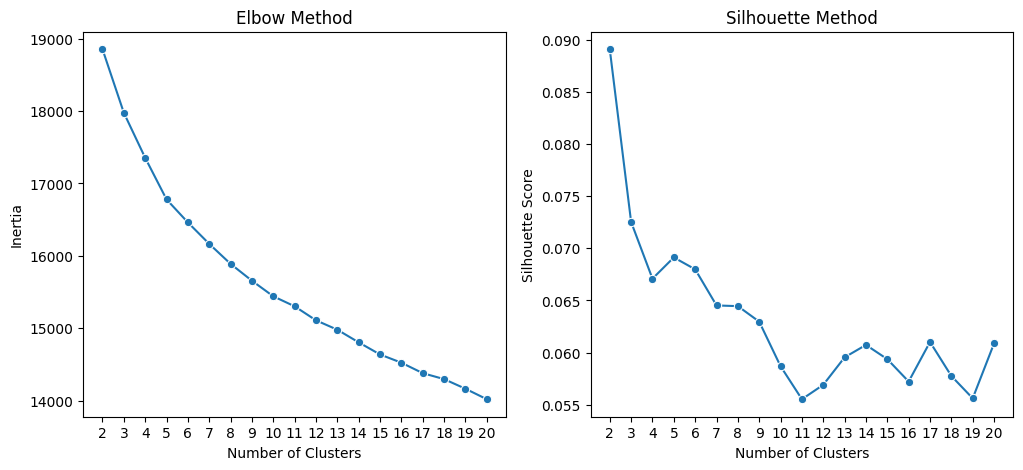

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(x=range(2, max_clusters + 1), y=inertia, ax=ax[0], marker="o")
ax[0].set_title("Elbow Method")
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("Inertia")
ax[0].set_xticks(range(2, max_clusters + 1))

sns.lineplot(x=range(2, max_clusters + 1), y=silhouette, ax=ax[1], marker="o")
ax[1].set_title("Silhouette Method")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_xticks(range(2, max_clusters + 1))
plt.show()


There's certain agreement between the two metrics in 5 clusters.

In [81]:
best_k_mod = KMeans(n_clusters=5, random_state=SEED, n_init=10)
best_k_mod.fit(representative_words_vectors)

KMeans(n_clusters=5, n_init=10, random_state=20180507)

In [82]:
word_clusters = pd.DataFrame({
    "word": representative_words_vectors.index,
    "cluster": best_k_mod.labels_
})
word_clusters

,word,cluster
0,sneakers,3
1,racks,3
2,necklaces,3
3,rings,3
4,webcams,4
...,...,...
1041,spacers,4
1042,empanadas,2
1043,antennas,4
1044,regulators,4


In [83]:
skus_with_cluster = domains.merge(word_clusters, left_on="representative_word", right_on="word")[["sku", "cluster"]]

In [84]:
skus_with_cluster

,sku,cluster
0,0,3
1,61,3
2,94,3
3,114,3
4,296,3
...,...,...
660762,209536,4
660763,209606,0
660764,323525,0
660765,374456,0


In [85]:
skus_with_cluster.to_csv("../storage/data/skus_with_cluster.csv", index=False)

In [86]:
metada_to_model_with = metadata[["sku", "site_id"]].merge(skus_with_cluster, on="sku")

In [88]:
data_to_model_with

,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,mean_diff,n_oses,sold_quantity_mean
0,179.135763,REA,classic,cross_docking,free_shipping,14.0,3,4.0
1,135.900000,REA,premium,fulfillment,free_shipping,19.0,3,8.0
2,250.304348,MEX,premium,drop_off,paid_shipping,0.0,1,1.0
3,399.000000,MEX,premium,fulfillment,free_shipping,14.0,4,2.0
4,116.233729,REA,premium,fulfillment,free_shipping,4.0,10,4.0
...,...,...,...,...,...,...,...,...
519758,12.803898,REA,classic,fulfillment,paid_shipping,7.0,8,3.0
519759,99.000000,MEX,classic,fulfillment,paid_shipping,11.0,2,7.0
519760,141.330847,REA,premium,fulfillment,free_shipping,16.0,3,4.0
519761,57.651017,REA,premium,fulfillment,paid_shipping,4.0,1,23.0


In [102]:
data_with_metadata_to_model_with = data_to_model_with.merge(metada_to_model_with, on="sku")

In [103]:
data_with_metadata_to_model_with

,sku,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,mean_diff,n_oses,sold_quantity_mean,site_id,cluster
0,0,179.135763,REA,classic,cross_docking,free_shipping,14.0,3,4.0,MLB,3
1,1,135.900000,REA,premium,fulfillment,free_shipping,19.0,3,8.0,MLB,3
2,2,250.304348,MEX,premium,drop_off,paid_shipping,0.0,1,1.0,MLM,3
3,3,399.000000,MEX,premium,fulfillment,free_shipping,14.0,4,2.0,MLM,3
4,4,116.233729,REA,premium,fulfillment,free_shipping,4.0,10,4.0,MLB,4
...,...,...,...,...,...,...,...,...,...,...,...
519648,660911,12.803898,REA,classic,fulfillment,paid_shipping,7.0,8,3.0,MLB,2
519649,660912,99.000000,MEX,classic,fulfillment,paid_shipping,11.0,2,7.0,MLM,2
519650,660913,141.330847,REA,premium,fulfillment,free_shipping,16.0,3,4.0,MLB,3
519651,660914,57.651017,REA,premium,fulfillment,paid_shipping,4.0,1,23.0,MLB,3


In [104]:
data_with_metadata_to_model_with.to_csv("../storage/data/data_with_metadata_to_model_with.csv", index=False)

: 